<a href="https://www.kaggle.com/code/hassaneskikri/descriptive-statistics-definition-and-types?scriptVersionId=168212241" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
%%html
<style>
    * {
        font-family: 'Arial', sans-serif;
    }
    h1{
        color: #60a5fa;
        border-bottom: 3px solid #60a5fa;
        text-align:center;
        padding-bottom: 0.3em;
        font-size:bold;
    }
    h2{
        color:#2dd4bf;
        padding-bottom: 0.3em;
    }
    p, ol, ul {
        font-size: 18px;
        line-height: 1.5;
        color: #eee;
    }
    a {
        color: #d946ef;
        text-decoration: none;
    }
    a:hover {
        text-decoration: underline;
        color : #86198f;
    }
    
</style>

# Descriptive statistics:
    
 **summarize and organize characteristics of a data set. A data set is a collection of responses or observations from a sample or entire population.**
    
- In quantitative research, after collecting data, the first step of statistical analysis is to describe characteristics of the responses, such as the average of one variable (e.g., age), or the relation between two variables (e.g., age and creativity).

- The next step is inferential statistics, which help you decide whether your data confirms or refutes your hypothesis and whether it is generalizable to a larger population.
    

# Table of contents

- Types of descriptive statistics
- Frequency distribution
- Measures of central tendency
- Measures of variability
- Univariate descriptive statistics
- Bivariate descriptive statistics

To practice each of this concept we wil setting up a simple data set and after each concept that we will lean there is a practicale example uder it for more understanding 

## Setting up the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)  # For reproducible results
data = {
    "Gender": np.random.choice(["Male", "Female", "Other"], 100),
    "Library_Visits": np.random.randint(0, 25, 100),
    "Movie_Theater_Visits": np.random.randint(0, 25, 100)
}
df = pd.DataFrame(data)
df.head()

,Gender,Library_Visits,Movie_Theater_Visits
0,Other,11,19
1,Male,7,11
2,Other,23,6
3,Other,10,1
4,Male,18,2


# 1. Types of descriptive statistics

## There are 3 main types of descriptive statistics:

- The distribution concerns the frequency of each value.
- The central tendency concerns the averages of the values.
- The variability or dispersion concerns how spread out the values are.


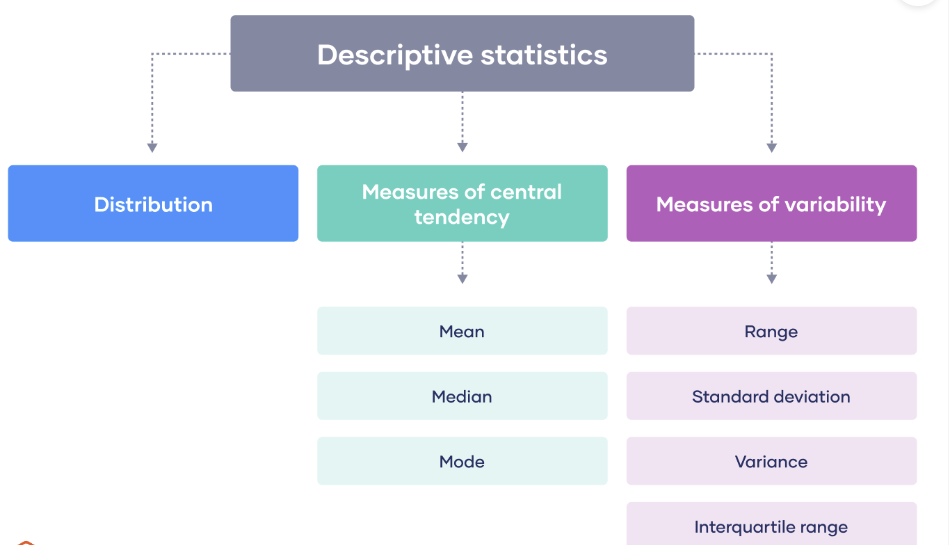

# 2.Frequency distribution

A data set is made up of a distribution of values, or scores. In tables or graphs, you can summarize the frequency of every possible value of a variable in numbers or percentages. This is called a frequency distribution.

## Simple frequency distribution table

For the variable of gender, you list all possible answers on the left hand column. You count the number or percentage of responses for each answer and display it on the right hand column.

In [3]:
pivot_table = df.pivot_table(index=['Gender'], 
                             values='Movie_Theater_Visits', 
                             aggfunc='sum').rename(columns={'Movie_Theater_Visits': 'Number'})


In [4]:
pivot_table

,Number
Gender,
Female,430
Male,392
Other,328


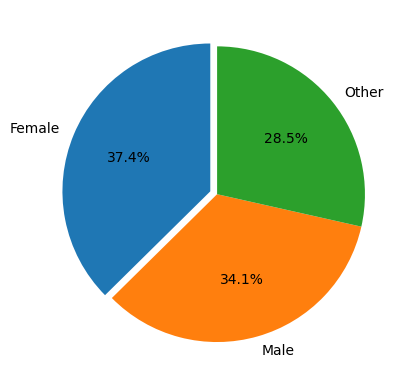

In [5]:
gender_list = pivot_table.index.to_list()
number_list = pivot_table['Number'].to_list()

explode = (0.05, 0, 0) 
plt.pie(number_list, labels=gender_list,autopct='%1.1f%%', startangle=90,explode=explode)
plt.show()

## Grouped frequency distribution table

In a grouped frequency distribution, you can group numerical response values and add up the number of responses for each group. You can also convert each of these numbers to percentages.

In [6]:
bins = [0, 4, 8, 12, 16, float('inf')]
labels = ['0–4', '5–8', '9–12', '13–16', '17+']

df['Visit_Range']  = pd.cut(df['Library_Visits'], bins = bins, labels= labels ,right=False )

visit_range_count = df['Visit_Range'].value_counts().unique()
visit_percentages =[i/df.shape[0] for i in visit_range_count ]
df.head()

,Gender,Library_Visits,Movie_Theater_Visits,Visit_Range
0,Other,11,19,9–12
1,Male,7,11,5–8
2,Other,23,6,17+
3,Other,10,1,9–12
4,Male,18,2,17+


In [7]:
print(visit_range_count)
print(visit_percentages)

[29 21 19 18 13]
[0.29, 0.21, 0.19, 0.18, 0.13]


In [8]:
 pd.DataFrame({
    'Visit Range': labels,
    'Visit Percentage': visit_percentages
})

,Visit Range,Visit Percentage
0,0–4,0.29
1,5–8,0.21
2,9–12,0.19
3,13–16,0.18
4,17+,0.13


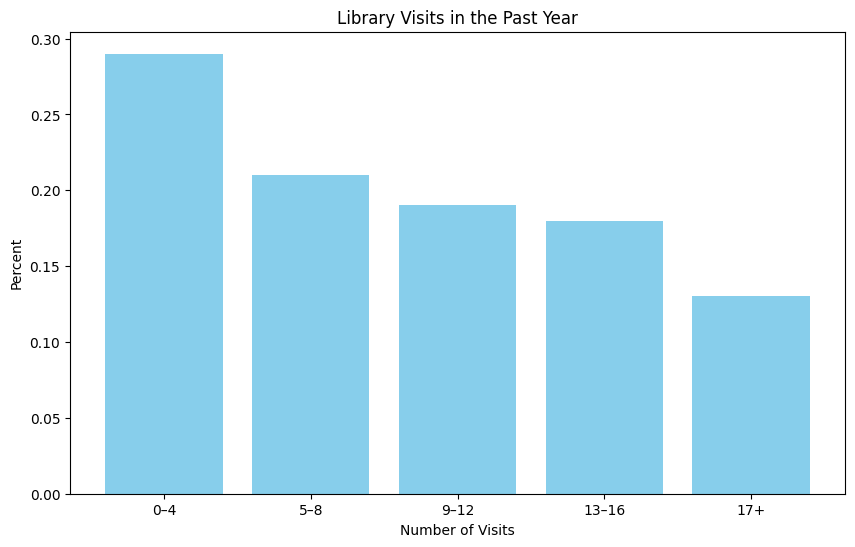

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(labels, visit_percentages, color='skyblue')
plt.title('Library Visits in the Past Year')
plt.xlabel('Number of Visits')
plt.ylabel('Percent')
plt.show()

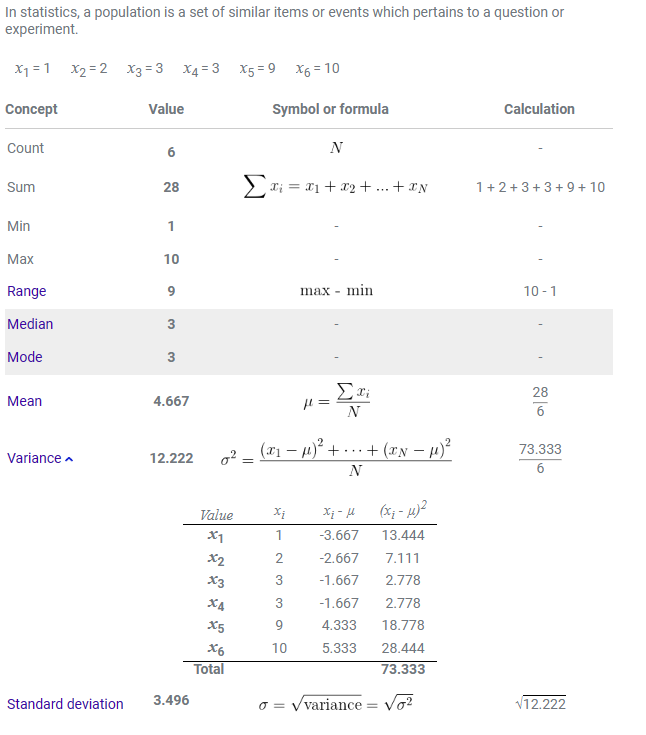

# Measures of central tendency

Measures of central tendency estimate the center, or average, of a data set. The mean, median and mode are 3 ways of finding the average.

In [10]:
# Mean of Library Visits
mean_library_visits = df["Library_Visits"].mean()
print(f"Mean Library Visits: {mean_library_visits}")

# Median of Library Visits
median_library_visits = df["Library_Visits"].median()
print(f"Median Library Visits: {median_library_visits}")

# Mode of Library Visits
mode_library_visits = df["Library_Visits"].mode()[0]
print(f"Mode Library Visits: {mode_library_visits}")


Mean Library Visits: 10.83
Median Library Visits: 10.0
Mode Library Visits: 6


# Measures of variability

Measures of variability give you a sense of how spread out the response values are. The range, standard deviation and variance each reflect different aspects of spread.

## Range
The range gives you an idea of how far apart the most extreme response scores are. To find the range, simply subtract the lowest value from the highest value.

Range of visits to the library in the past year

Ordered data set:  0, 3, 3, 12, 15, 24

Range: 24 – 0 = 24

## Standard deviation
The standard deviation (s or SD) is the average amount of variability in your dataset. It tells you, on average, how far each score lies from the mean. The larger the standard deviation, the more variable the data set is.

1. List each score and find their mean.
2. Subtract the mean from each score to get the deviation from the mean.
3. Square each of these deviations.
4. Add up all of the squared deviations.
5. Divide the sum of the squared deviations by N – 1.
6. Find the square root of the number you found.


## Variance
The variance is the average of squared deviations from the mean. Variance reflects the degree of spread in the data set. The more spread the data, the larger the variance is in relation to the mean.

To find the variance, simply square the standard deviation. The symbol for variance is s2.

In [11]:
# Range of Library Visits
range_library_visits = df["Library_Visits"].max() - df["Library_Visits"].min()
print(f"Range of Library Visits: {range_library_visits}")

# Standard Deviation of Library Visits
std_dev_library_visits = df["Library_Visits"].std()
print(f"Standard Deviation of Library Visits: {std_dev_library_visits}")

# Variance of Library Visits
variance_library_visits = df["Library_Visits"].var()
print(f"Variance of Library Visits: {variance_library_visits}")


Range of Library Visits: 24
Standard Deviation of Library Visits: 7.33203156489979
Variance of Library Visits: 53.75868686868686


# Univariate descriptive statistics

Univariate descriptive statistics focus on only one variable at a time. It’s important to examine data from each variable separately using multiple measures of distribution, central tendency and spread. Programs like SPSS and Excel can be used to easily calculate these.

If you were to only consider the mean as a measure of central tendency, your impression of the “middle” of the data set can be skewed by outliers, unlike the median or mode.

Likewise, while the range is sensitive to outliers, you should also consider the standard deviation and variance to get easily comparable measures of spread.

# Bivariate descriptive statistics


Bivariate descriptive statistics
If you’ve collected data on more than one variable, you can use bivariate or multivariate descriptive statistics to explore whether there are relationships between them.

In bivariate analysis, you simultaneously study the frequency and variability of two variables to see if they vary together. You can also compare the central tendency of the two variables before performing further statistical tests.

Multivariate analysis is the same as bivariate analysis but with more than two variables.

## Contingency table

In a contingency table, each cell represents the intersection of two variables. Usually, an independent variable appears along the vertical axis and a dependent one appears along the horizontal axis . You read “across” the table to see how the independent and dependent variables relate to each other.
 You read “across” the table to see how the independent and dependent variables relate to each other.

In [12]:
contingency_table = pd.crosstab(df["Gender"], df["Visit_Range"])
print(contingency_table)

Visit_Range  0–4  5–8  9–12  13–16  17+
Gender                                 
Female        11    6     4      3   12
Male           2   10     8      2   11
Other          5    5     7      8    6


In [13]:
contingency_table_percentage = contingency_table.div(contingency_table.sum(1), axis=0) * 100
print(contingency_table_percentage)

Visit_Range        0–4        5–8       9–12      13–16        17+
Gender                                                            
Female       30.555556  16.666667  11.111111   8.333333  33.333333
Male          6.060606  30.303030  24.242424   6.060606  33.333333
Other        16.129032  16.129032  22.580645  25.806452  19.354839


In [14]:
df.columns

Index(['Gender', 'Library_Visits', 'Movie_Theater_Visits', 'Visit_Range'], dtype='object')

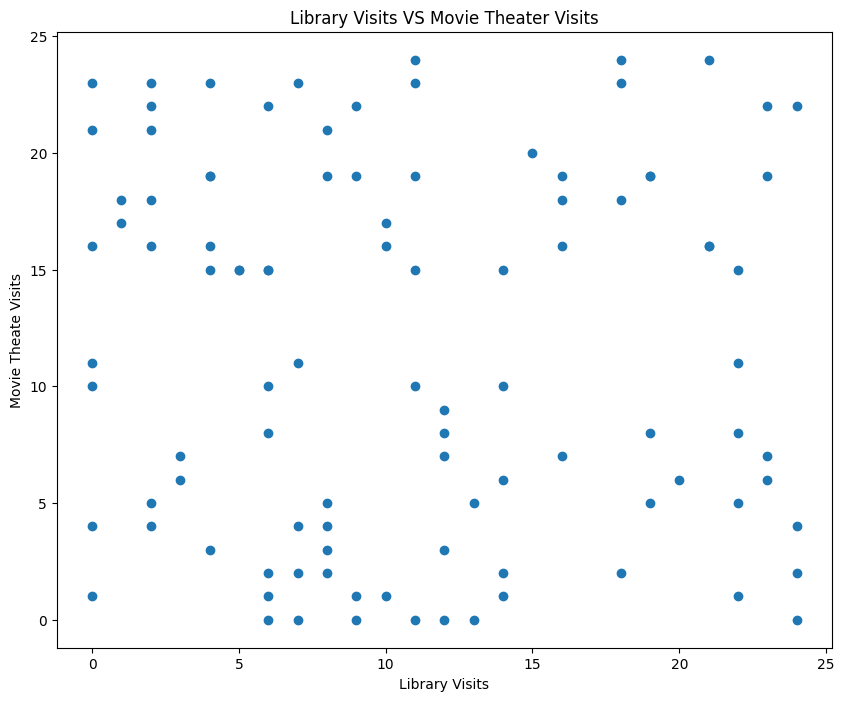

In [15]:
# Scatter plot 

plt.figure(figsize=(10,8))
plt.scatter(df["Library_Visits"],df["Movie_Theater_Visits"],alpha=1)
plt.title("Library Visits VS Movie Theater Visits")
plt.xlabel("Library Visits")
plt.ylabel("Movie Theate Visits")
plt.show()